In [1]:
import yfinance as yf
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume, TrendLine, TrendLineProperties, RsiDivergenceProperties
from mplchart.indicators import RSI

ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="1y")

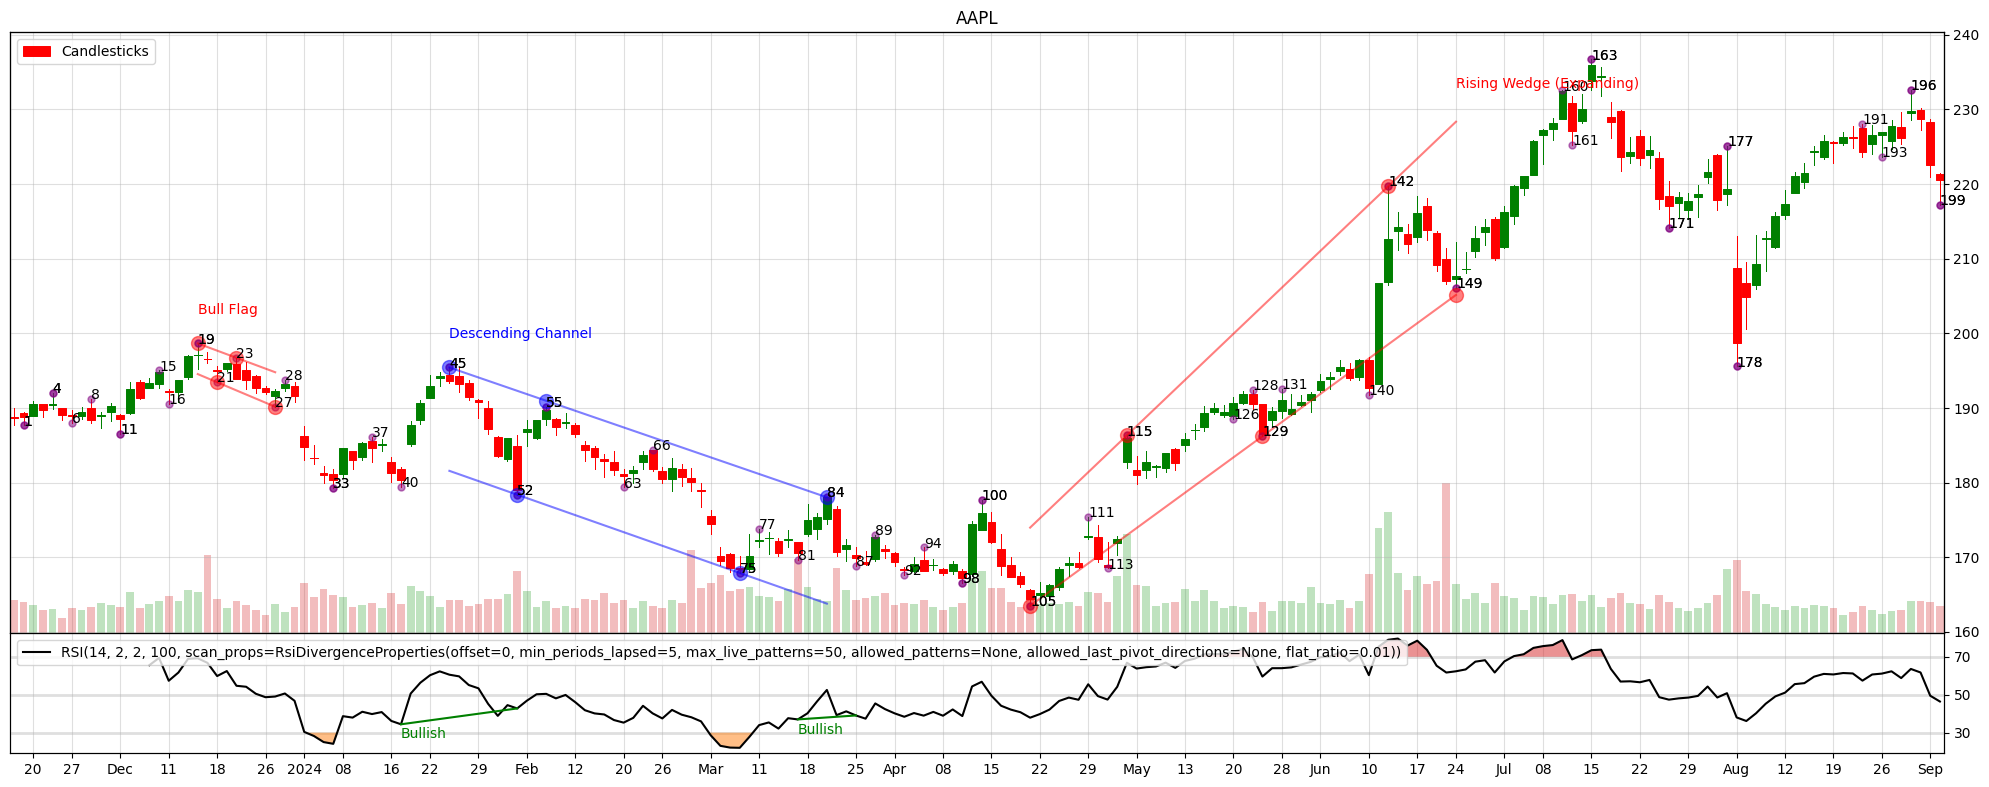

In [3]:
# Configure pattern scanning
scan_props = TrendLineProperties(
        number_of_pivots=5,
        error_ratio=1e-6,
    )

scan_props_pf = TrendLineProperties(
        number_of_pivots=4,
        error_ratio=1e-6,
)

scan_props_rsi = RsiDivergenceProperties(
    flat_ratio=0.01,
)

indicators = [
    Candlesticks(colorup="green", colordn="red"),
    Volume(),
    TrendLine(backcandels=2, forwardcandels=2, pivot_limit=100, show_pivots=True, scan_props=scan_props_pf),
    TrendLine(backcandels=5, forwardcandels=5, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    #RSI()
    RSI(backcandels=2, forwardcandels=2, pivot_limit=100, scan_props=scan_props_rsi),
    # SMA(50),
    # SMA(200),
    # MACD(),
]

daily = prices.iloc[0:200]
chart = Chart(title=ticker, figsize=(20, 8), max_ticks=90)
chart.plot(daily, indicators)



## Debug Zigzag

In [11]:
from mplchart.zigzag import Zigzag

zigzag = Zigzag(backcandels=2, forwardcandels=2, pivot_limit=55, offset=0)
prices["high"] = prices["High"]
prices["low"] = prices["Low"]
prices["close"] = prices["Close"]
prices["open"] = prices["Open"]
zigzag.calculate(prices)

for pivot in zigzag.zigzag_pivots:
    print(f"Pivot: time={pivot.point.time}, index={pivot.point.index}, price={pivot.point.price}")
print(f"Number of pivots: {len(zigzag.zigzag_pivots)}")

Pivot: time=2024-11-14 00:00:00-05:00, index=250, price=228.8699951171875
Pivot: time=2024-11-11 00:00:00-05:00, index=247, price=221.5
Pivot: time=2024-11-08 00:00:00-05:00, index=246, price=228.66000366210938
Pivot: time=2024-11-04 00:00:00-05:00, index=242, price=219.46854635353304
Pivot: time=2024-10-28 00:00:00-04:00, index=237, price=234.472033847566
Pivot: time=2024-10-23 00:00:00-04:00, index=234, price=227.50969037853835
Pivot: time=2024-10-15 00:00:00-04:00, index=228, price=237.22900130875718
Pivot: time=2024-10-07 00:00:00-04:00, index=222, price=221.08676038639473
Pivot: time=2024-10-04 00:00:00-04:00, index=221, price=227.74942888869526
Pivot: time=2024-10-02 00:00:00-04:00, index=219, price=222.77491454853467
Pivot: time=2024-09-30 00:00:00-04:00, index=217, price=232.7439422607422
Pivot: time=2024-09-25 00:00:00-04:00, index=214, price=223.77380760174057
Pivot: time=2024-09-20 00:00:00-04:00, index=211, price=232.83382873595048
Pivot: time=2024-09-16 00:00:00-04:00, ind